<a href="https://colab.research.google.com/github/JSEFERINO/Curso_Estadistica/blob/main/03_Estudiando_con_Samuel3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estudiando con Samuel - Sesión 3**
+  Regresión de mínimos cuadrados y Análisis de desviaciones de la linealidad



# **Regresión de Mínimos Cuadrados y Análisis de Desviaciones de la Linealidad**

## **1. Regresión de Mínimos Cuadrados**

+ La **regresión de mínimos cuadrados** es una técnica para ajustar un modelo lineal que minimiza la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos. El modelo lineal básico es:

$$
y = \beta_0 + \beta_1 x + \epsilon
$$

donde:
- $ y $: Variable dependiente.
- $ x $: Variable independiente.
- $ \beta_0 $ y $ \beta_1 $: Coeficientes del modelo (intercepto y pendiente).
- $ \epsilon $: Error aleatorio, asumido con media cero y varianza constante.

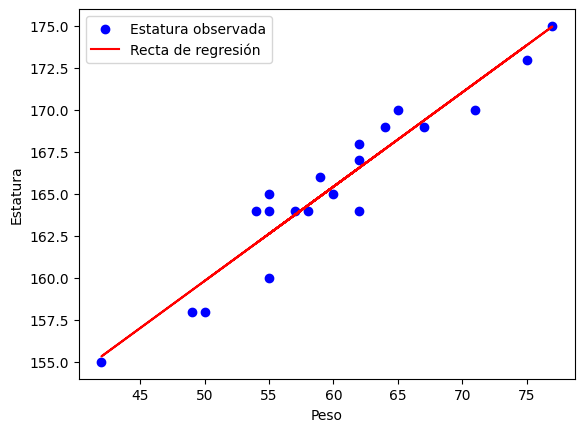

In [7]:
# @title **Un ejemplo práctico $X = Peso$ y $Y = Estatura$**

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Datos de ejemplo
x = np.array([50,   57,  62,  58,  65,  77,  71,  55,  67,  75,  49,  42,  59,  64,  62,  55,  60,  62,  54,  55]).reshape(-1, 1)
y = np.array([158, 164, 167, 164, 170, 175, 170, 165, 169, 173, 158, 155, 166, 169, 168, 164, 165, 164, 164, 160])

# Crear el modelo y ajustar los datos
model = LinearRegression()
model.fit(x, y)

# Predicciones
y_pred = model.predict(x)

# Gráfico de la regresión
plt.scatter(x, y, color='blue', label='Estatura observada')
plt.plot(x, y_pred, color='red', label='Recta de regresión')
plt.xlabel('Peso')
plt.ylabel('Estatura')
plt.legend()
plt.show()



# **Estimaciones de Mínimos cuadrados para los coeficientes del Modelo**
## **Cálculo de la Pendiente, Intercepto y Coeficiente de Regresión**

Para un modelo de regresión lineal simple:

$$y = \beta_0 + \beta_1 x + \epsilon$$

donde:
- $ y $ es la variable dependiente,
- $ x $ es la variable independiente,
- $ \beta_0 $ es el intercepto,
- $ \beta_1 $ es la pendiente.

## **1. Cálculo de la Pendiente $ \beta_1 $**

La fórmula para calcular la **pendiente** $ \beta_1 $ es:

$$
\beta_1 = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sum{(x_i - \bar{x})^2}}
$$

donde:
- $ x_i $ y $ y_i $ son los valores individuales de las variables,
- $ \bar{x} $ es el promedio de la variable independiente $ x $,
- $ \bar{y} $ es el promedio de la variable dependiente $ y $.

## **2. Cálculo del Intercepto $ \beta_0 $**

El **intercepto** $ \beta_0 $ se calcula como:

$$
\beta_0 = \bar{y} - \beta_1 \bar{x}
$$

donde:
- $ \beta_1 $ es la pendiente calculada anteriormente,
- $ \bar{x} $ y $ \bar{y} $ son los promedios de $ x $ y $ y $, respectivamente.

## **3. Cálculo del Coeficiente de Determinación $ R^2 $**

El **coeficiente de determinación** $ R^2 $ mide la proporción de la variabilidad en $ y $ explicada por el modelo de regresión. Su fórmula es:

$$
R^2 = \frac{\sum{(\hat{y}_i - \bar{y})^2}}{\sum{(y_i - \bar{y})^2}}
$$

donde:
- $ \hat{y}_i $ son los valores predichos por el modelo,
- $ y_i $ son los valores observados,
- $ \bar{y} $ es el promedio de los valores observados de $ y $.

También puede expresarse como:

$$
R^2 = 1 - \frac{\sum{(y_i - \hat{y}_i)^2}}{\sum{(y_i - \bar{y})^2}}
$$

+ Esta expresión indica el ajuste del modelo, con $ R^2 = 1 $ para un ajuste perfecto y $ R^2 = 0 $ cuando el modelo no explica la variabilidad de $ y $.

In [12]:
# @title **a. Calculando las medias de x , y**
x_mean = np.mean(x)
y_mean = np.mean(y)
print(f'la media para x es {x_mean}')
print(f'la media para y es {y_mean}')



la media para x es 59.95
la media para y es 165.4


In [19]:
# @title **b. Calculando variabilidad conjunta**
s_xy = np.sum((x.flatten() - x_mean)*(y - y_mean))
s_xx = np.sum((x - x_mean)*(x - x_mean))
s_yy = np.sum((y - y_mean)*(y - y_mean))
print(f'la variabilidad conjunta es s_xy = {s_xy}')
print(f's_xx = {s_xx:.2f}')
print(f's_yy = {s_yy:.2f} ')


la variabilidad conjunta es s_xy = 789.4
s_xx = 1406.95
s_yy = 484.80 


In [21]:

# @title **c.la pendiente $\beta_1$**
beta_1 = s_xy/s_xx
print(f'La pendiente de la recta es beta_1 = {beta_1:.2f}')

La pendiente de la recta es beta_1 = 0.56


In [27]:

# @title **d. El intercepto es $\beta_0$**
beta_0 = y_mean - beta_1*x_mean
print(f'El intercepto de la recta es beta_0 = {beta_0:.2f}')

El intercepto de la recta es beta_0 = 131.76


In [26]:
# @title **e. La recta de regresión es**
print(f'La recta estimada de regresión es Y = {beta_0:.2f}+{beta_1:.2f}X')

La recta estimada de regresión es Y = 131.76+0.56X


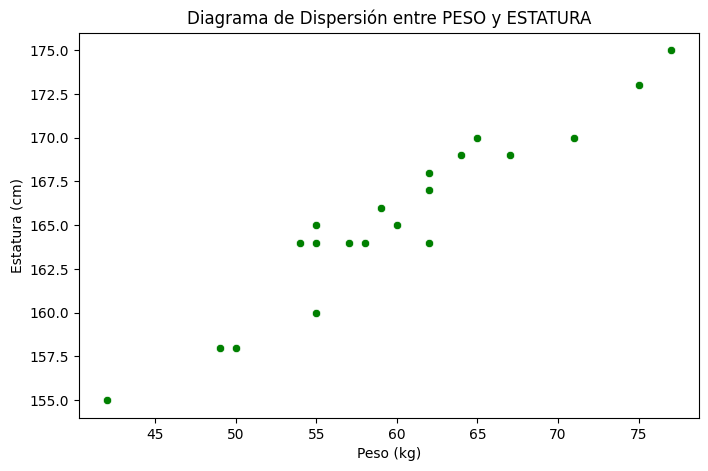

In [28]:
# @title **4. Un ejemplo práctico de Regresión Lineal mas real**
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# @title **a. Los datos y el Diagrama de Dispersión**
# Datos
peso =     [50,   57,  62,  58,  65,  77,  71,  55,  67,  75,  49,  42,  59,  64,  62,  55,  60,  62,  54,  55]
estatura = [158, 164, 167, 164, 170, 175, 170, 165, 169, 173, 158, 155, 166, 169, 168, 164, 165, 164, 164, 160]

# Crear DataFrame
df = pd.DataFrame({'PESO': peso, 'ESTATURA': estatura})

# Gráfico de dispersión
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='PESO', y='ESTATURA', color='g')
plt.title("Diagrama de Dispersión entre PESO y ESTATURA")
plt.xlabel("Peso (kg)")
plt.ylabel("Estatura (cm)")
plt.show()


## **2. Recordando los elementos o Estadísticos de la Regresión Lineal simple**

In [29]:
# @title **c. suma de x y medias** $$sum_x=\sum_{i=1}^{20}x_i,\bar{x}=\frac{sum_x}{n}\\sum_y=\sum_{i=1}^{20}y_i,\bar{y}=\frac{sum_y}{n}$$
n = len(df)
media_x = df['PESO'].mean()
media_y = df['ESTATURA'].mean()
sum_x = media_x*n
sum_y = media_y*n

print(f'Tenemos sum_x = {media_x*n}, media_x = {media_x}, n={n}')
print(f'Tenemos sum_y = {media_y*n}, media_y = {media_y}')

Tenemos sum_x = 1199.0, media_x = 59.95, n=20
Tenemos sum_y = 3308.0, media_y = 165.4


In [30]:
# @title **d. Desviaciones** $$s_x^2=\frac{\sum_{i=1}^{20}x_i^2-n*\bar{x}^2}{n-1}\\s_y^2=\frac{\sum_{i=1}^{20}y_i^2-n*\bar{y}^2}{n-1}$$
import numpy as np
s_x = np.sqrt(((df['PESO']**2).sum() - n*media_x**2) / (n-1))
s_y = np.sqrt(((df['ESTATURA']**2).sum() - n*media_y**2) / (n-1))


print(f'Tenemos s_x = {s_x}, s_y = {s_y}')
print(f'Tomando dos cifras decimales s_x = {s_x:.2f}, s_y = {s_y:.2f}')



Tenemos s_x = 8.60523096726631, s_y = 5.051315618101935
Tomando dos cifras decimales s_x = 8.61, s_y = 5.05


In [ ]:
# @title **e. $$sum_{xy}=\sum_{i=1}^{20}{x_i}{y_i}\\cov_{(x,y)}=\frac{\sum_{i=1}^{20}{x_i}{y_i}-n*\bar{x}*\bar{y}}{n-1}$$**

sum_xy = (df['PESO']*df['ESTATURA']).sum()
cov_xy = (sum_xy - n*media_x*media_y) / (n-1)

print(f'Tenemos sum_xy = {sum_xy}, cov_xy = {cov_xy}')
print(f'Tomando dos cifras decimales cov_xy = {cov_xy:.2f}')


Tenemos sum_xy = 199104, cov_xy = 41.547368421052326
Tomando dos cifras decimales cov_xy = 41.55


In [ ]:
# @title **f. El coeficiente de correlacion $r$ y $R^2$** $$r=\frac{cov_{(x,y)}}{s_x*s_y} \\ R^2 = r^2*100$$
r = cov_xy / (s_x * s_y)
print(f'Tenemos r = {r}')
print(f'Tomando dos cifras decimales r = {r:.2f}')
R2 = r**2 * 100
print(f'Tenemos R2 = {R2}')
print(f'Tomando dos cifras decimales R2 = {R2:.2f}')


Tenemos r = 0.9558208163551811
Tomando dos cifras decimales r = 0.96
Tenemos R2 = 91.35934329778848
Tomando dos cifras decimales R2 = 91.36


In [ ]:
# @title **g. Hallemos los coeficientes del modelo de regresión** $$b = \frac{cov_{(x,y)}}{s_x^2} \\ a = \bar{y}-b*\bar{x}$$
b = cov_xy / (s_x**2)
a = media_y - b*media_x

print(f'Tenemos la pendiente del modelo es b = {cov_xy:.2f} / {s_x**2:.2f} = {b:.2f}')

print(f' y el intercepto es a = = {media_y:.2f} - {b:.2f}*{media_x}={a:.2f}')

Tenemos la pendiente del modelo es b = 41.55 / 74.05 = 0.56
 y el intercepto es a = = 165.40 - 0.56*59.95=131.76


In [ ]:
# @title **h. Hallemos la recta ajustada para el modelo de regresión** $$y = a+b*x$$
# y = a + b*x
print(f'Modelo ajustado y = {a:.2f}+{b:.2f}*x')


Modelo ajustado y = 131.76+0.56*x


Los parametros del modelo de regresion son:
Pendiente: 0.56, Intercepto: 131.76
Modelo de Regresión Lineal: ESTATURA=131.76+0.56*PESO


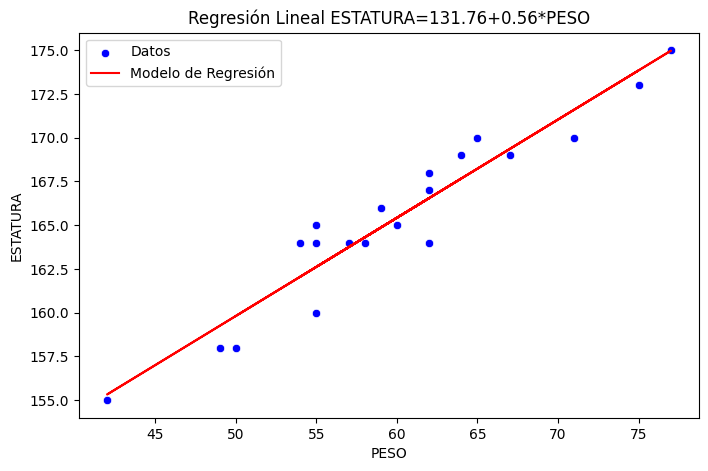

In [ ]:
from sklearn.linear_model import LinearRegression

# @title **i. Diagrama de Dispersión con la recta ajustada**

X = df[['PESO']]
Y = df['ESTATURA']
modelo = LinearRegression()
modelo.fit(X, Y)

# Coeficientes
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_

print('Los parametros del modelo de regresion son:')
print(f"Pendiente: {pendiente:.2f}, Intercepto: {intercepto:.2f}")
print(f"Modelo de Regresión Lineal: ESTATURA={intercepto:.2f}+{pendiente:.2f}*PESO")

# Predicción
df['y_pred'] = modelo.predict(X)

# Gráfico con la recta de regresión
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='PESO', y='ESTATURA', color='b', label='Datos')
plt.plot(df['PESO'], df['y_pred'], color='r', label='Modelo de Regresión')
plt.title(f"Regresión Lineal ESTATURA={intercepto:.2f}+{pendiente:.2f}*PESO")
plt.xlabel("PESO")
plt.ylabel("ESTATURA")
plt.legend()
plt.show()

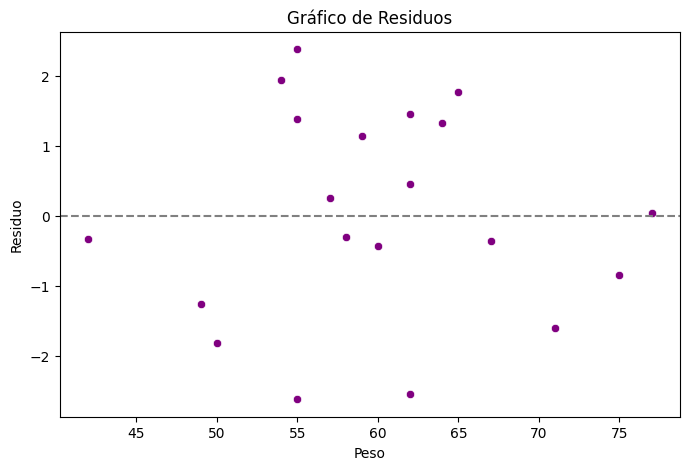

In [ ]:

# @title **j. Calculando los residuos**
df['residuo'] = df['ESTATURA'] - df['y_pred']

# Residual plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='PESO', y='residuo', color='purple')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Gráfico de Residuos")
plt.xlabel("Peso")
plt.ylabel("Residuo")
plt.show()

In [ ]:
# @title **k. Imprimiendo los residuos**
df

,PESO,ESTATURA,y_pred,residuo
0,50,158,159.817335,-1.817335
1,57,164,163.744838,0.255162
2,62,167,166.550197,0.449803
3,58,164,164.305910,-0.305910
4,65,170,168.233413,1.766587
5,77,175,174.966275,0.033725
6,71,170,171.599844,-1.599844
7,55,165,162.622694,2.377306
8,67,169,169.355556,-0.355556
9,75,173,173.844131,-0.844131


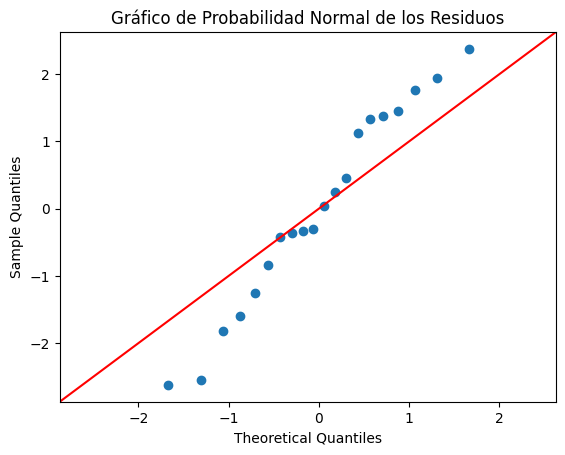

In [ ]:
# @title **l. Hazme el grafico de probabilidad normal para los residuos**

import statsmodels.api as sm
import matplotlib.pyplot as plt


fig = sm.qqplot(df['residuo'], line='45')
plt.title('Gráfico de Probabilidad Normal de los Residuos')
plt.show()

In [ ]:
# @title **m. Dos pruebas anlaiticas para la normalidad de residuos**

from scipy import stats

# Shapiro-Wilk Test
shapiro_test = stats.shapiro(df['residuo'])
print("Shapiro-Wilk Test:")
print(f"Statistic: {shapiro_test.statistic:.3f}")
print(f"P-value: {shapiro_test.pvalue:.3f}")

# Kolmogorov-Smirnov Test
ks_test = stats.kstest(df['residuo'], 'norm')
print("\nKolmogorov-Smirnov Test:")
print(f"Statistic: {ks_test.statistic:.3f}")
print(f"P-value: {ks_test.pvalue:.3f}")

Shapiro-Wilk Test:
Statistic: 0.960
P-value: 0.547

Kolmogorov-Smirnov Test:
Statistic: 0.221
P-value: 0.242


# **n. Coeficiente de correlación de Pearson - Interpretacion**

+ El **coeficiente de correlación de Pearson** mide la **fuerza y dirección de la relación lineal** entre dos variables cuantitativas. A diferencia del coeficiente de Spearman, que solo evalúa relaciones monótonas, Pearson requiere que la relación entre las variables sea **lineal**.

+ Este coeficiente, denotado por $ r $, toma valores entre -1 y 1 y se interpreta de la siguiente manera:

- **$ r = +1 $**: Correlación **positiva perfecta**. Indica que a medida que una variable aumenta, la otra también lo hace de manera proporcional.
- **$ r = -1 $**: Correlación **negativa perfecta**. Indica que a medida que una variable aumenta, la otra disminuye de manera proporcional.
- **$ r = 0 $**: No hay correlación lineal entre las variables. En otras palabras, los cambios en una variable no están asociados con cambios lineales en la otra.

### **Interpretación de Rangos del Coeficiente de Pearson**

+ El valor de $ r $ se interpreta en rangos según su magnitud:

| Valor de $ r $  | Interpretación                       |
|:-------------------:|:--------------------------------------:|
| 0 a ±0.19         | Muy débil (o prácticamente nula)    |
| ±0.20 a ±0.39     | Débil                               |
| ±0.40 a ±0.59     | Moderada                            |
| ±0.60 a ±0.79     | Fuerte                              |
| ±0.80 a ±1.00     | Muy fuerte                          |

### **Ejemplo de Interpretación**

- Si obtienes un **$ r = 0.85 $**, esto indica una **muy fuerte relación positiva** entre las variables: a medida que una variable aumenta, la otra también tiende a aumentar de manera proporcional.
- Si **$ r = -0.35 $**, esto sugiere una **relación negativa débil**: a medida que una variable aumenta, la otra tiende a disminuir, aunque no de manera consistente.

### **Nota Importante**
+ El coeficiente de Pearson evalúa **solo relaciones lineales**. Por lo tanto, una relación no lineal fuerte entre dos variables puede dar un valor de $ r $ cercano a cero, aunque exista una dependencia entre ellas.

In [ ]:

# @title **o. Redefinamos nuestras variables que vamos a usar en la regresión**

PESO =df['PESO'].values
ESTATURA = df['ESTATURA'].values

In [ ]:
#@title **p. Definimos las variables Dependientes y las Independientes**
Y = np.array([ESTATURA]).T # Elegimos una variable para la regresión (.T es para la transpuesta)
X = np.array(PESO).reshape(-1, 1)  # Variable independiente, reshape to a 2D array

In [ ]:

# @title **q. Definimos el Modelo de Regresión Lineal**
from sklearn.metrics import mean_squared_error # Importing the necessary function

import numpy as np
from sklearn.linear_model import LinearRegression


reg = LinearRegression() # Parte del Modelo
reg = reg.fit(X,Y) # Ajustar el modelo
Y_pred = reg.predict(X) # Predicción del odelo
error = np.sqrt(mean_squared_error(Y,Y_pred)) , # Error cuadratico medio
R_2 = reg.score(X,Y)


In [ ]:
# @title **r. Los resultados del Modelo**
print('El error cuadratico medio es ', error)
print('El valor de R_cuadrado es ', R_2)
print('Los coeficientes de regresión son: \n', reg.intercept_,  reg.coef_) # '\n' es para el espacio vertical


El error cuadratico medio es  (1.4472370865270165,)
El valor de R_cuadrado es  0.9135934329777555
Los coeficientes de regresión son: 
 [131.76374427] [[0.56107182]]


In [ ]:
# @title **s. Realizar una predicción**

PESO_1 =75

print('La predicción para los valores dados es ', reg.predict([[75]]))

La predicción para los valores dados es  [[173.84413092]]
